In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)


df = pd.read_csv('/Users/justynakurach/Documents/GitHub/IronHackLabs/Week 5/clean_for_modelling_fin.csv')


In [5]:
df

,title,imdbid,bechdel_id,bechdel_score,year,certificate,runtime_min,genre,imdb_rating,about,director,stars,votes,gross_earn,genre_1,genre_2,genre_3
0,Sherlock Jr.,15324.0,2011,0,1924,U,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, and puts his meagre skills to work when he is framed by a rival for stealing his girlfriend's father's pocketwatch.",Buster Keaton,"('Buster Keaton',), ('Kathryn McGuire',), ('Joe Keaton',), ('Erwin Connelly',)",49517,980000.0,Action,Comedy,Romance
1,Battleship Potemkin,15648.0,1308,0,1925,Rejected,75,"Drama, History, Thriller",8.0,"In the midst of the Russian Revolution of 1905, the crew of the battleship Potemkin mutiny against the brutal, tyrannical regime of the vessel's officers. The resulting street demonstration in Odessa brings on a police massacre.",Sergei Eisenstein,"('Aleksandr Antonov',), ('Vladimir Barskiy',), ('Grigoriy Aleksandrov',), ('Ivan Bobrov',)",57550,50000.0,Drama,History,Thriller
2,Sunrise: A Song of Two Humans,18455.0,1632,2,1927,A,94,"Drama, Romance",8.1,"A sophisticated urban woman seduces a farmer in the hopes that he will murder his neglected wife and join her in the city, but he soon finds himself rekindling his romance with the latter when she discovers their scheme.",F.W. Murnau,"(""George O'Brien"",), ('Janet Gaynor',), ('Margaret Livingston',), ('Bodil Rosing',)",50942,540000.0,Drama,Romance,NaN
3,All Quiet on the Western Front,20629.0,1316,0,1930,PG,152,"Drama, War",8.1,"A German youth eagerly enters World War I, but his enthusiasm wanes as he gets a firsthand view of the horror.",Lewis Milestone,"('Lew Ayres',), ('Louis Wolheim',), ('John Wray',), ('Arnold Lucy',)",61320,3270000.0,Drama,War,NaN
4,M,22100.0,610,3,1931,A,117,"Crime, Mystery, Thriller",8.3,"When the police in a German city are unable to catch a child-murderer, other criminals join in the manhunt.",Fritz Lang,"('Peter Lorre',), ('Ellen Widmann',), ('Inge Landgut',), ('Otto Wernicke',)",156810,30000.0,Crime,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Ghost in the Shell,1219827.0,7551,3,2017,15,83,"Animation, Action, Crime",7.9,A cyborg policewoman and her partner hunt a mysterious and powerful hacker called the Puppet Master.,Mamoru Oshii,"('Atsuko Tanaka',), ('Iemasa Kayumi',), ('Akio Ôtsuka',), ('Kôichi Yamadera',)",141897,520000.0,Animation,Action,Crime
2219,King Arthur,1972591.0,7608,1,2017,12A,126,"Action, Adventure, Drama",6.3,A demystified take on the tale of King Arthur and the Knights of the Round Table.,Antoine Fuqua,"('Clive Owen',), ('Stephen Dillane',), ('Keira Knightley',), ('Ioan Gruffudd',)",167734,51880000.0,Action,Adventure,Drama
2220,Murder on the Orient Express,3402236.0,7919,3,2017,A,128,"Crime, Drama, Mystery",7.3,"In December 1935, when his transcontinental luxury train is stranded by deep snow, detective Hercule Poirot is called on to solve a murder that occurred in his car the night before, with a multitude of suspects.",Sidney Lumet,"('Albert Finney',), ('Lauren Bacall',), ('Ingrid Bergman',), ('Sean Connery',)",62253,70000.0,Crime,Drama,Mystery
2221,Pet Sematary,837563.0,8824,3,2019,18,103,"Fantasy, Horror, Thriller",6.5,"After tragedy strikes, a grieving father discovers an ancient burial ground behind his home with the power to raise the dead.",Mary Lambert,"('Dale Midkiff',), ('Denise Crosby',), ('Fred Gwynne',), ('Brad Greenquist',)",103833,57470000.0,Fantasy,Horror,Thriller


In [6]:
# Create a new column called "num_movies_directed" that represents the number of movies each director has directed
df['num_movies_directed'] = df.groupby('director')['title'].transform('count')

# Display the first few rows of the updated dataset
print(df.head())


                            title   imdbid  bechdel_id  bechdel_score  year certificate  runtime_min                     genre  imdb_rating                                                                                                                                                                                                                                 about           director                                                                                       stars   votes  gross_earn genre_1   genre_2    genre_3  num_movies_directed
0                    Sherlock Jr.  15324.0        2011              0  1924           U           45   Action, Comedy, Romance          8.2                                                                     A film projectionist longs to be a detective, and puts his meagre skills to work when he is framed by a rival for stealing his girlfriend's father's pocketwatch.      Buster Keaton              ('Buster Keaton',), ('Kathryn McGuire',), ('Joe

In [8]:
df[['director','num_movies_directed']]

,director,num_movies_directed
0,Buster Keaton,1
1,Sergei Eisenstein,1
2,F.W. Murnau,1
3,Lewis Milestone,1
4,Fritz Lang,1
...,...,...
2218,Mamoru Oshii,1
2219,Antoine Fuqua,6
2220,Sidney Lumet,4
2221,Mary Lambert,1


In [11]:
# Get the count of each unique value in the "genre_1" column
genre_counts = df['genre_1'].value_counts()

# Create a dictionary to map genre names to their respective counts
genre_count_dict = dict(genre_counts)

# Create a new column called "num_genre_1" that represents the number of instances of each genre in the "genre_1" column
df['num_genre_1'] = df['genre_1'].map(genre_count_dict)

# Display the first few rows of the updated dataset
print(df.head())


                            title   imdbid  bechdel_id  bechdel_score  year certificate  runtime_min                     genre  imdb_rating                                                                                                                                                                                                                                 about           director                                                                                       stars   votes  gross_earn genre_1   genre_2    genre_3  num_movies_directed  num_genre_1
0                    Sherlock Jr.  15324.0        2011              0  1924           U           45   Action, Comedy, Romance          8.2                                                                     A film projectionist longs to be a detective, and puts his meagre skills to work when he is framed by a rival for stealing his girlfriend's father's pocketwatch.      Buster Keaton              ('Buster Keaton',), ('Kathryn McGu

In [12]:
df

,title,imdbid,bechdel_id,bechdel_score,year,certificate,runtime_min,genre,imdb_rating,about,director,stars,votes,gross_earn,genre_1,genre_2,genre_3,num_movies_directed,num_genre_1
0,Sherlock Jr.,15324.0,2011,0,1924,U,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, and puts his meagre skills to work when he is framed by a rival for stealing his girlfriend's father's pocketwatch.",Buster Keaton,"('Buster Keaton',), ('Kathryn McGuire',), ('Joe Keaton',), ('Erwin Connelly',)",49517,980000.0,Action,Comedy,Romance,1,594
1,Battleship Potemkin,15648.0,1308,0,1925,Rejected,75,"Drama, History, Thriller",8.0,"In the midst of the Russian Revolution of 1905, the crew of the battleship Potemkin mutiny against the brutal, tyrannical regime of the vessel's officers. The resulting street demonstration in Odessa brings on a police massacre.",Sergei Eisenstein,"('Aleksandr Antonov',), ('Vladimir Barskiy',), ('Grigoriy Aleksandrov',), ('Ivan Bobrov',)",57550,50000.0,Drama,History,Thriller,1,370
2,Sunrise: A Song of Two Humans,18455.0,1632,2,1927,A,94,"Drama, Romance",8.1,"A sophisticated urban woman seduces a farmer in the hopes that he will murder his neglected wife and join her in the city, but he soon finds himself rekindling his romance with the latter when she discovers their scheme.",F.W. Murnau,"(""George O'Brien"",), ('Janet Gaynor',), ('Margaret Livingston',), ('Bodil Rosing',)",50942,540000.0,Drama,Romance,NaN,1,370
3,All Quiet on the Western Front,20629.0,1316,0,1930,PG,152,"Drama, War",8.1,"A German youth eagerly enters World War I, but his enthusiasm wanes as he gets a firsthand view of the horror.",Lewis Milestone,"('Lew Ayres',), ('Louis Wolheim',), ('John Wray',), ('Arnold Lucy',)",61320,3270000.0,Drama,War,NaN,1,370
4,M,22100.0,610,3,1931,A,117,"Crime, Mystery, Thriller",8.3,"When the police in a German city are unable to catch a child-murderer, other criminals join in the manhunt.",Fritz Lang,"('Peter Lorre',), ('Ellen Widmann',), ('Inge Landgut',), ('Otto Wernicke',)",156810,30000.0,Crime,Mystery,Thriller,1,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Ghost in the Shell,1219827.0,7551,3,2017,15,83,"Animation, Action, Crime",7.9,A cyborg policewoman and her partner hunt a mysterious and powerful hacker called the Puppet Master.,Mamoru Oshii,"('Atsuko Tanaka',), ('Iemasa Kayumi',), ('Akio Ôtsuka',), ('Kôichi Yamadera',)",141897,520000.0,Animation,Action,Crime,1,129
2219,King Arthur,1972591.0,7608,1,2017,12A,126,"Action, Adventure, Drama",6.3,A demystified take on the tale of King Arthur and the Knights of the Round Table.,Antoine Fuqua,"('Clive Owen',), ('Stephen Dillane',), ('Keira Knightley',), ('Ioan Gruffudd',)",167734,51880000.0,Action,Adventure,Drama,6,594
2220,Murder on the Orient Express,3402236.0,7919,3,2017,A,128,"Crime, Drama, Mystery",7.3,"In December 1935, when his transcontinental luxury train is stranded by deep snow, detective Hercule Poirot is called on to solve a murder that occurred in his car the night before, with a multitude of suspects.",Sidney Lumet,"('Albert Finney',), ('Lauren Bacall',), ('Ingrid Bergman',), ('Sean Connery',)",62253,70000.0,Crime,Drama,Mystery,4,158
2221,Pet Sematary,837563.0,8824,3,2019,18,103,"Fantasy, Horror, Thriller",6.5,"After tragedy strikes, a grieving father discovers an ancient burial ground behind his home with the power to raise the dead.",Mary Lambert,"('Dale Midkiff',), ('Denise Crosby',), ('Fred Gwynne',), ('Brad Greenquist',)",103833,57470000.0,Fantasy,Horror,Thriller,1,12


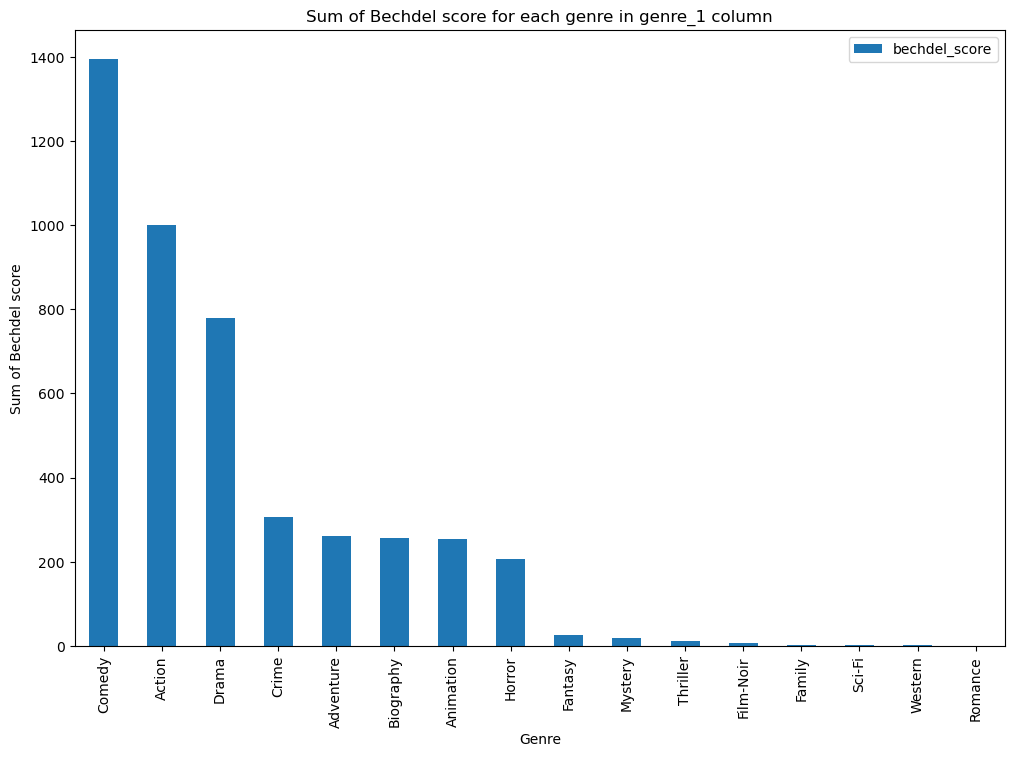

In [13]:
# Create a pivot table that shows the sum of the Bechdel score for each unique value in the "genre_1" column
genre_bechdel_sum = pd.pivot_table(df, values='bechdel_score', index=['genre_1'], aggfunc=np.sum)

# Sort the pivot table by the sum of Bechdel score in descending order
genre_bechdel_sum = genre_bechdel_sum.sort_values(by='bechdel_score', ascending=False)

# Plot the pivot table as a bar chart
genre_bechdel_sum.plot(kind='bar', figsize=(12,8))
plt.xlabel('Genre')
plt.ylabel('Sum of Bechdel score')
plt.title('Sum of Bechdel score for each genre in genre_1 column')
plt.show()


In [10]:
df.to_csv('for_tableau_midterm.csv')